# Exercise

Find the original problem description in kaggle here. https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data 

SalePrice is the outcome variable. 
Use a clean version of the data that is treated for null values. https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv
    

- Find number of categorical and continuous variables
- Some observations contain null values in SalesPrice. Drop those records from the analysis 
- Divide the data into training and test data 70/30 ratio with seed =1
- Build a model to estimate SalePrice excluding Id as feature. Calculate R2 and RMSE - Linear regression, Lasso, Ridge, Elastic net
- Take log of the sales price, does the R2 score improves?
- Try model with polynomial terms with degree = 2
- Try PCA - what is required number of principal components to retain 99% of variance?
- Try Feature selection - find 10 most significant features of the dataset. 




In [1]:
import pandas as pd
from sklearn import *
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'0.23.4'

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [9]:
del df["Id"]

In [23]:
df = df.dropna()

rmse_training:  0.08606817747710854
rmse_test 76190488351.17424
r2_training:  0.9494518297088844
r2_test -3.0715943247509893e+22


Text(0.5, 1.0, 'Residual plot')

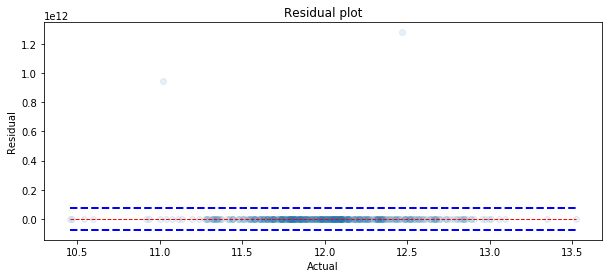

In [24]:
target = "SalesPrice"
X = df.drop(columns=target)

#y = df[target]
y = np.log(df[target])

X_dummy = pd.get_dummies(X, drop_first=True)
features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

residuals_test = y_test_pred - y_test

plt.figure(figsize=(10, 4))
plt.scatter(y_test, residuals_test, alpha = 0.1)
plt.hlines(0, np.min(y_test), np.max(y_test), linestyle = "--", color = "red", linewidth = 1)
residual_std = np.std(residuals_test)
plt.hlines([residual_std, -residual_std], np.min(y_test), np.max(y_test)
                   , linestyle = "--", color = "blue", linewidth = 2)


plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

In [25]:
target = "SalesPrice"
X = df.drop(columns=target)
X = pd.get_dummies(X, drop_first=True).values * 1.0
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print("X shape: ", X.shape)
X

X shape:  (1460, 258)


array([[ 0.07337496, -0.23082236, -0.20714171, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.4380509 , -0.09188637, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.07337496, -0.09704771,  0.07347998, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 0.30985939, -0.18623081, -0.14781027, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276, -0.09704771, -0.08016039, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.21509315, -0.05811155, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [26]:
pca = decomposition.PCA()
X_pca = pca.fit_transform(X)

In [34]:
variances = np.var(X_pca, axis = 0)
variances.shape

(258,)

([], <a list of 0 Text xticklabel objects>)

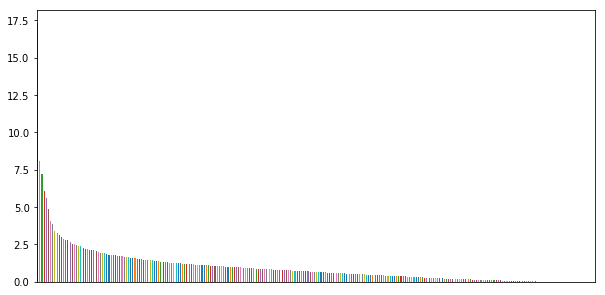

In [35]:
plt.figure(figsize=(10, 5))
pd.Series(variances).plot.bar()
plt.xticks([])

In [33]:
pca.explained_variance_ratio_

array([6.71516159e-02, 3.12583796e-02, 2.79905007e-02, 2.35364042e-02,
       2.17708344e-02, 1.89024670e-02, 1.56777805e-02, 1.50771734e-02,
       1.30897148e-02, 1.25825050e-02, 1.21455492e-02, 1.16898322e-02,
       1.12101447e-02, 1.07758620e-02, 1.07172325e-02, 1.02975266e-02,
       9.89599947e-03, 9.77393903e-03, 9.64743219e-03, 9.36594389e-03,
       9.23220669e-03, 8.85441356e-03, 8.62816618e-03, 8.47189060e-03,
       8.31738044e-03, 8.19192191e-03, 8.12316774e-03, 7.91615470e-03,
       7.72018065e-03, 7.59180364e-03, 7.46591506e-03, 7.35346528e-03,
       7.32363462e-03, 7.07301605e-03, 7.02087062e-03, 6.93359402e-03,
       6.87837460e-03, 6.77245922e-03, 6.67570100e-03, 6.59457661e-03,
       6.49126728e-03, 6.39844957e-03, 6.37224022e-03, 6.29729904e-03,
       6.19203926e-03, 6.07624483e-03, 5.99987660e-03, 5.91563070e-03,
       5.80510204e-03, 5.78222766e-03, 5.72502653e-03, 5.64871898e-03,
       5.59167548e-03, 5.52897946e-03, 5.45152958e-03, 5.34603641e-03,
      

In [36]:
variances/variances.sum()

array([6.71516159e-02, 3.12583796e-02, 2.79905007e-02, 2.35364042e-02,
       2.17708344e-02, 1.89024670e-02, 1.56777805e-02, 1.50771734e-02,
       1.30897148e-02, 1.25825050e-02, 1.21455492e-02, 1.16898322e-02,
       1.12101447e-02, 1.07758620e-02, 1.07172325e-02, 1.02975266e-02,
       9.89599947e-03, 9.77393903e-03, 9.64743219e-03, 9.36594389e-03,
       9.23220669e-03, 8.85441356e-03, 8.62816618e-03, 8.47189060e-03,
       8.31738044e-03, 8.19192191e-03, 8.12316774e-03, 7.91615470e-03,
       7.72018065e-03, 7.59180364e-03, 7.46591506e-03, 7.35346528e-03,
       7.32363462e-03, 7.07301605e-03, 7.02087062e-03, 6.93359402e-03,
       6.87837460e-03, 6.77245922e-03, 6.67570100e-03, 6.59457661e-03,
       6.49126728e-03, 6.39844957e-03, 6.37224022e-03, 6.29729904e-03,
       6.19203926e-03, 6.07624483e-03, 5.99987660e-03, 5.91563070e-03,
       5.80510204e-03, 5.78222766e-03, 5.72502653e-03, 5.64871898e-03,
       5.59167548e-03, 5.52897946e-03, 5.45152958e-03, 5.34603641e-03,
      

In [37]:
pca.explained_variance_ratio_.sum()

1.0

In [41]:
variance_cumsum = pd.Series(np.cumsum(pca.explained_variance_ratio_))
variance_cumsum[variance_cumsum>0.99][:10]

201    0.990155
202    0.990718
203    0.991268
204    0.991812
205    0.992316
206    0.992806
207    0.993276
208    0.993727
209    0.994161
210    0.994582
dtype: float64

In [42]:
pca = decomposition.PCA(n_components=0.99)
X_pca = pca.fit_transform(X)

In [43]:
X_pca.shape

(1460, 202)

rmse_training:  0.1036055554199897
rmse_test 0.1618897964320302
r2_training:  0.9267535951634049
r2_test 0.861324003303343


Text(0.5, 1.0, 'Residual plot')

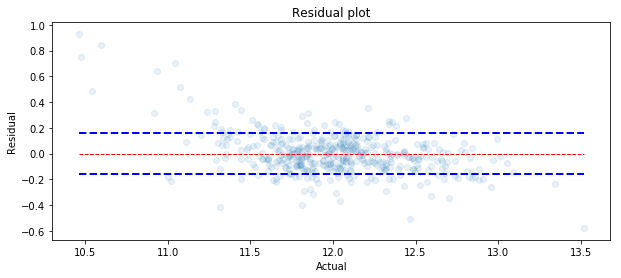

In [45]:
target = "SalesPrice"
X = df.drop(columns=target)

#y = df[target]
y = np.log(df[target])

X_dummy = pd.get_dummies(X, drop_first=True)
features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("pca", decomposition.PCA(n_components=0.99)),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

residuals_test = y_test_pred - y_test

plt.figure(figsize=(10, 4))
plt.scatter(y_test, residuals_test, alpha = 0.1)
plt.hlines(0, np.min(y_test), np.max(y_test), linestyle = "--", color = "red", linewidth = 1)
residual_std = np.std(residuals_test)
plt.hlines([residual_std, -residual_std], np.min(y_test), np.max(y_test)
                   , linestyle = "--", color = "blue", linewidth = 2)


plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

In [46]:
scores = model_selection.cross_val_score(pipe, X_dummy, y, cv = 5)

In [47]:
scores, np.mean(scores)

(array([0.87747475, 0.85123299, 0.85282389, 0.8848337 , 0.75993328]),
 0.8452597236141898)

In [49]:
pd.DataFrame(pca.inverse_transform(X_pca))

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,0.010258,-0.243628,-0.177855,0.636935,-0.530959,1.009072,0.916900,0.474607,0.616172,-0.249819,...,-0.053723,-0.061702,-0.286803,-0.038424,0.380571,-0.031540,-0.058098,-0.102139,0.518879,-0.281576
1,-0.859858,0.460054,-0.116887,-0.145378,2.130724,0.101645,-0.368788,-0.539888,1.214103,-0.313345,...,0.003196,-0.010768,-0.286807,-0.022826,0.605465,-0.068373,-0.087068,-0.150377,0.456506,-0.145553
2,0.069558,-0.096108,0.006981,0.637576,-0.524289,1.035694,0.831164,0.369433,0.110762,-0.257361,...,-0.025990,-0.034067,-0.241451,-0.015563,0.539135,-0.067909,-0.109999,-0.135517,0.462881,-0.227689
3,0.259969,-0.591693,-0.064528,0.379551,-0.367938,-1.303919,-0.777418,-0.594456,-0.293107,-0.230447,...,-0.041791,-0.151646,-0.349018,-0.039070,0.233608,0.021480,-0.058263,-0.100659,-2.002260,-0.305521
4,0.050210,0.571301,0.344094,1.246190,-0.480526,0.938517,0.698768,1.332292,0.431187,-0.273625,...,-0.050723,-0.056183,-0.299204,-0.032498,0.412591,-0.032563,-0.088377,-0.090734,0.530672,-0.235711
5,-0.190628,0.703381,0.380609,-0.707412,-0.579275,0.605254,0.531554,-0.564469,0.621953,-0.282405,...,-0.039672,-0.057996,-0.264183,-0.021874,0.524533,-0.068392,-0.093663,-0.146389,0.420474,-0.239941
6,-0.967844,0.135876,-0.107565,1.420321,-0.552012,1.001953,0.972120,0.370864,1.761536,-0.301611,...,0.003823,-0.022322,-0.196670,0.009333,0.559425,-0.053800,-0.126167,-0.084918,0.563180,-0.143768
7,0.170229,0.477777,-0.015445,0.589611,0.361645,0.023235,-0.562998,0.780283,0.969094,-0.097387,...,-0.044106,0.005715,-0.340845,-0.036659,0.553535,-0.060394,-0.053031,-0.145805,0.444460,-0.152690
8,-0.084730,-0.912937,-0.496786,0.580628,-0.640793,-1.863518,-1.664586,-0.514696,-1.129885,-0.499830,...,-0.101386,-0.048574,-0.416609,-0.061717,0.201672,-0.154339,-0.101116,-0.091027,-2.091113,-0.312797
9,3.232060,-0.877468,-0.269171,-0.804105,0.288525,-1.537764,-1.677669,-0.524917,0.689891,-0.364045,...,-0.060941,0.039238,-0.385004,-0.052762,0.543059,-0.179519,-0.239008,-0.199210,0.046469,-0.386914
